In [1]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector

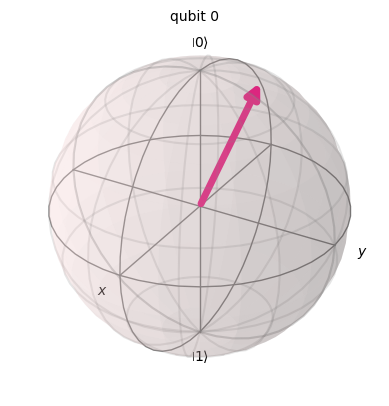

In [17]:
q_0 = random_statevector(dims=2)
plot_bloch_multivector(q_0)

In [18]:
set_state = Initialize(q_0)
test = QuantumCircuit(1, 1)
test.append(set_state, [0])
test.measure(0, 0)
test.draw()

┌───────────────────────────────────────────────┐┌─┐
  q: ┤ Initialize(0.60015-0.65868j,-0.2992+0.34124j) ├┤M├
     └───────────────────────────────────────────────┘└╥┘
c: 1/══════════════════════════════════════════════════╩═
                                                       0

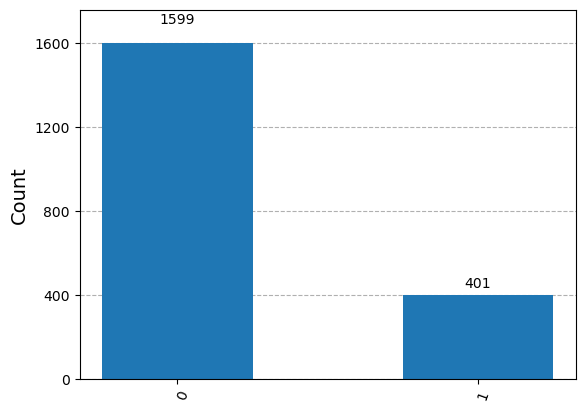

In [19]:
temp_sim = AerSimulator()
transpile_test = transpile(test, temp_sim)
temp_res = temp_sim.run(transpile_test, shots=2000).result().get_counts()
plot_histogram(temp_res)